In [1]:
import pandas as pd
import matplotlib
import pandas_profiling
import cufflinks as cf
from plotly.offline import plot


In [2]:
sourceFile = '/Volumes/Samsung_T5/huzekang/dataset/Data Analysis/链家jupty数据分析/community.csv'
# 读取csv,设置low_memory=False防止内存不够时报警告
df = pd.read_csv(sourceFile, low_memory=False)


In [3]:
# 使用pandas_profiling生成丰富的数据EDA报告 (交互式时，大数据集必须加上minimal参数。但在命令行中直接使用 pandas_profiling 则没事)
# Exploratory Data Analysis(EDA)
result =df.profile_report(title='数据报告',minimal=True)
result.to_file('/Volumes/Samsung_T5/huzekang/dataset/数据报告.html')


build report structure: 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


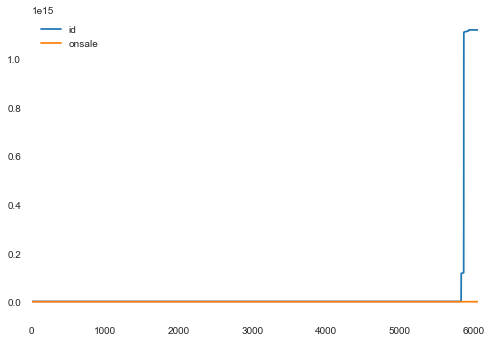

In [4]:
# pandas原生可视化分析
df.plot()


In [5]:
# 查看数据类型
type(df)


pandas.core.frame.DataFrame

In [6]:
# 看看一共有多少数据，多少列
df.shape


(6059, 8)

In [7]:
# 设置列数太多时不隐藏
pd.set_option("display.max.columns", None)
# 设置数据小数点后面跟2位
pd.set_option("display.precision", 2)
# 查看前五行
df.head()


,id,title,link,district,bizcircle,tagList,onsale,validdate
0,1111000004310,什坊院甲3号院,https://bj.lianjia.com/xiaoqu/1111000004310/,海淀,田村,NaN,0,2017-11-29 15:47:56
1,1111027373682,大慧寺6号院,https://bj.lianjia.com/xiaoqu/1111027373682/,海淀,白石桥,NaN,2,2017-11-29 15:39:42
2,1111027373683,东花市北里东区,https://bj.lianjia.com/xiaoqu/1111027373683/,东城,东花市,近地铁1号线王府井站,0,2017-11-29 14:57:31
3,1111027373684,东花市北里西区,https://bj.lianjia.com/xiaoqu/1111027373684/,东城,东花市,近地铁7号线广渠门内站,7,2017-11-29 14:56:56
4,1111027373685,东花市北里中区,https://bj.lianjia.com/xiaoqu/1111027373685/,东城,东花市,近地铁2号线朝阳门站,9,2017-11-29 14:56:18


In [8]:
# 显示所有列及其数据类型
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6059 entries, 0 to 6058
Data columns (total 8 columns):
id           6059 non-null int64
title        6059 non-null object
link         6059 non-null object
district     6059 non-null object
bizcircle    6059 non-null object
tagList      4571 non-null object
onsale       6059 non-null int64
validdate    6059 non-null object
dtypes: int64(2), object(6)
memory usage: 378.8+ KB


In [9]:
import numpy as np
# 概述每个列包含的值了
# 默认情况下仅分析数字列，但是如果使用include参数，则可以提供其他数据类型
df.describe(include=np.object)


,title,link,district,bizcircle,tagList,validdate
count,6059,6059,6059,6059,4571,6059
unique,6055,6059,4,141,185,6059
top,永安东里,https://bj.lianjia.com/xiaoqu/1111043241688/,朝阳,西四,近地铁2号线积水潭站,2017-11-29 14:34:05
freq,2,1,1764,148,147,1


In [10]:
# 探索分析某列
df['district'].value_counts()


朝阳    1764
海淀    1651
西城    1531
东城    1113
Name: district, dtype: int64

In [11]:
# 探索分析海淀的各个商圈的房屋数
df.loc[df["district"] == "海淀", "bizcircle"].value_counts()


紫竹桥       87
清河        85
西山        84
海淀北部新区    83
五棵松       82
公主坟       75
甘家口       64
定慧寺       61
田村        57
西直门       53
苏州桥       53
小西天       48
军博        46
白石桥       43
五道口       42
皂君庙       42
马连洼       40
万寿路       40
牡丹园       40
四季青       38
学院路       36
中关村       35
魏公村       35
西三旗       32
玉泉路       31
知春路       30
颐和园       28
世纪城       27
北太平庄      25
安宁庄       24
新街口       23
上地        21
双榆树       20
厂洼        18
万柳        17
西北旺       15
马甸        15
二里庄       15
圆明园       11
海淀其它       9
西二旗        9
六里桥        8
杨庄         4
Name: bizcircle, dtype: int64